In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, mean_squared_log_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

## Process train Data

In [92]:
dftrain= pd.read_csv("Train.csv")


In [93]:
dftrain.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


### EDA

In [94]:
print("Shape of Data: ",dftrain.shape)
print()
print(dftrain.info())
print()
print(dftrain.describe())
print()
print("Null Values are:")
print(dftrain.isnull().sum())

Shape of Data:  (188340, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB
None

            Store_id        Holiday         #Order          Sales
count  188340.000000  188340.000000  188340.000000  188340.000000
mean      183.000000       0.131783      68.205692   42784.327982
std       105.366308       0.338256      30.467415  

In [95]:
for i in dftrain.columns:
    print(i, dftrain[i].unique())
    print("")
    print("")

ID ['T1000001' 'T1000002' 'T1000003' ... 'T1188338' 'T1188339' 'T1188340']


Store_id [  1 253 252 251 250 249 248 247 246 254 245  11 243 242 241 240 239 238
 237 244 236 255 256 273 272 271 270 269 268   9 267  10 266 264 263 262
 261 260 259 258 257 265 235 234 233 211 210 209 208 207  14 206 205 212
 204 202 201 200 199 198 197 196 195 203 213 214 215 232  12 231 230 229
 228 227 226 225 224 223 222 221 220 219  13 218 217 216 274  15 275 277
 335 334 333 332 331 330   4 329 336 328 326 325 324 323 322 321 320 319
 327 318 337 339 355 354   2 353 352 351 350 349 338 348 346 345 344 343
 342   3 341 340 347 317   5 316 293   7 292 291 290 289 288 287 294 286
 284 283 282 281   8 280 279 278 285 295 296 297 315 314 313 312 311 310
 309 308 307 306 305   6 304 303 302 301 300 299 298 276 194 193 192  87
  86  85  24  84  83  82  81  88  80  78  77  76  75  74  73  72  25  79
  71  89  91 108 107 106 105 104 103 102 101  90 100  98  97  23  96  95
  94  93  92  99  70  69  68  46  45  

In [96]:
num_feature= [feature for feature in dftrain.columns if dftrain[feature].dtypes!="O"]
print("Numerical features are",num_feature)

Numerical features are ['Store_id', 'Holiday', '#Order', 'Sales']


In [97]:
disc_feature=[feature for feature in num_feature if len(dftrain[feature].unique())<20]
print("Discrete features are",disc_feature)

Discrete features are ['Holiday']


In [98]:
cont_feature=[feature for feature in num_feature if feature not in disc_feature]
print("Continuous features are",cont_feature)

Continuous features are ['Store_id', '#Order', 'Sales']


In [99]:
cat_feature=[feature for feature in dftrain.columns if dftrain[feature].dtypes=="O"]
print("Categorical features are",cat_feature)

Categorical features are ['ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Discount']


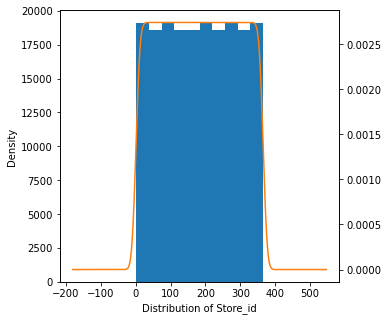

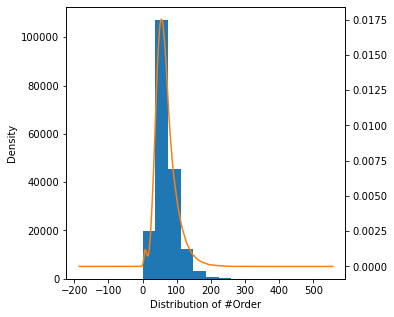

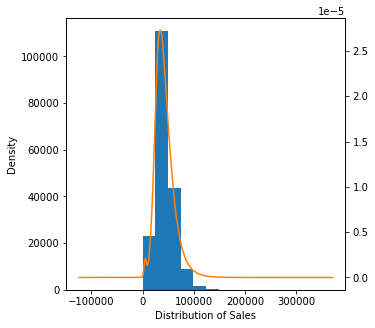

In [100]:
for feature in cont_feature:
        fig,ax=plt.subplots(figsize=(5,5))
        dftrain[feature].plot(kind='hist', ax=ax)
        dftrain[feature].plot(kind='kde', ax=ax, secondary_y =True)
        ax.set_xlabel("Distribution of {}".format(feature))
        plt.show()

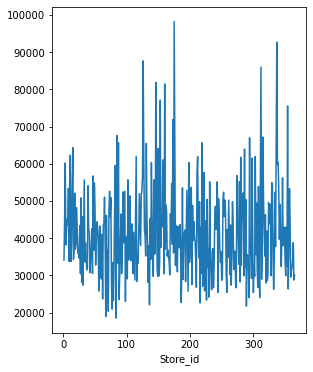

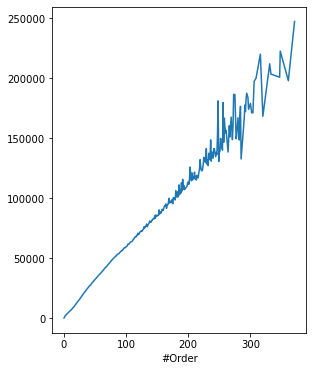

In [101]:
dfcopy=dftrain.copy()

for feature in cont_feature[:-1]:
    fig=plt.figure(figsize=(10,6))
    ax=fig.add_subplot(121)
    dfcopy.groupby(feature)["Sales"].median().plot()


In [102]:
encoder= preprocessing.LabelEncoder()
for i in cat_feature:
    dftrain[i]= encoder.fit_transform(dftrain[i])

In [103]:
dftrain

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,0,1,0,2,0,0,1,1,9,7011.84
1,1,253,3,1,0,0,1,1,60,51789.12
2,2,252,2,1,0,0,1,1,42,36868.20
3,3,251,1,2,0,0,1,1,23,19715.16
4,4,250,1,2,3,0,1,1,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,188335,149,1,2,1,515,1,1,51,37272.00
188336,188336,153,3,1,0,515,1,0,90,54572.64
188337,188337,154,0,2,1,515,1,0,56,31624.56
188338,188338,155,2,0,1,515,1,1,70,49162.41


<AxesSubplot:>

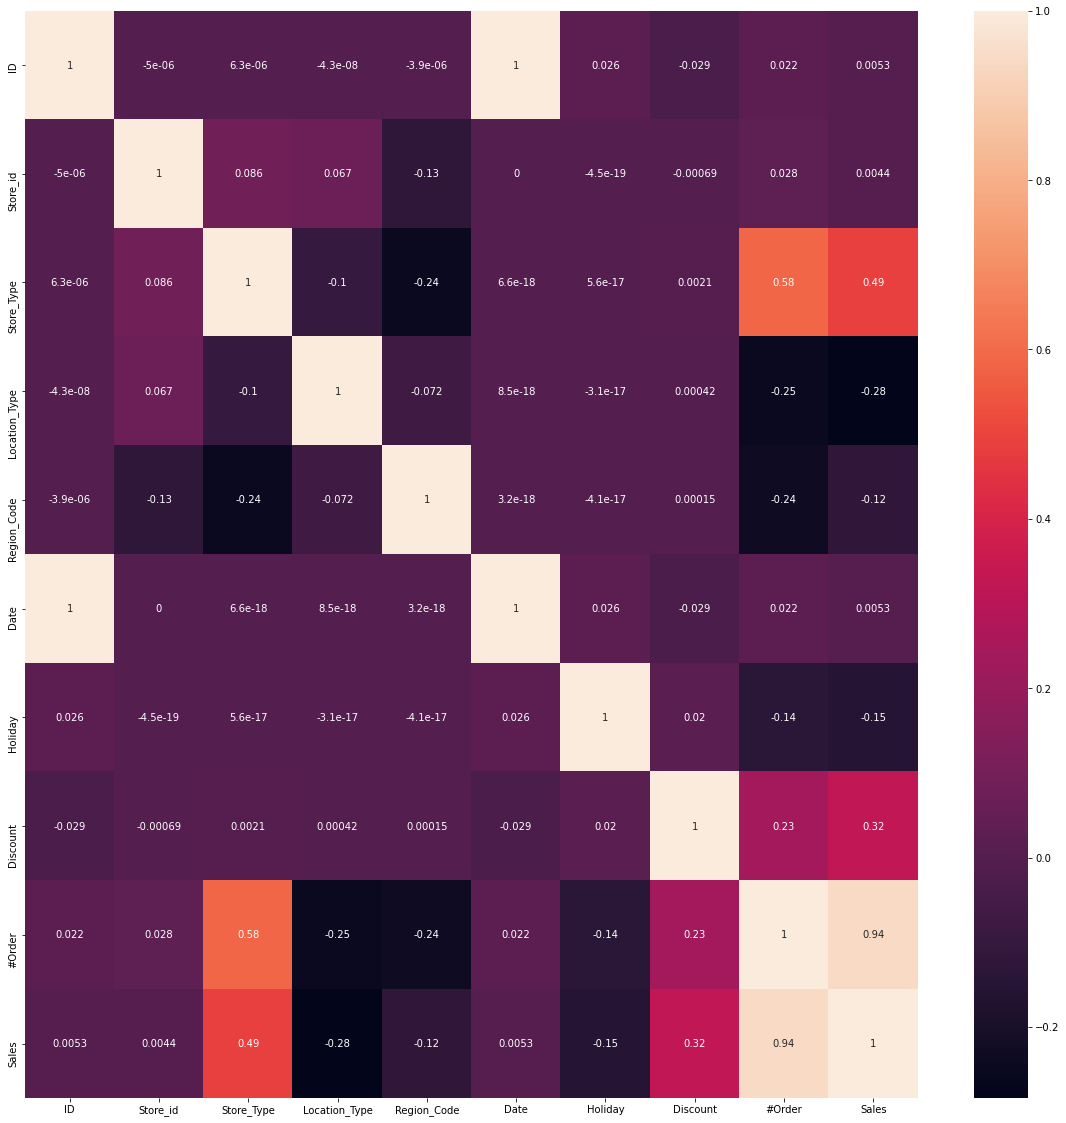

In [104]:
plt.figure(figsize=(20,20))
sns.heatmap(dftrain.corr(), annot=True)

In [105]:
dftrain= dftrain[dftrain["Sales"]!=0]

In [106]:
X = dftrain.drop(['#Order','Sales','ID'], axis=1)
Y = dftrain['Sales']

## Process test data

In [107]:
dftest= pd.read_csv('TEST_FINAL.csv')

In [108]:
cat1_feature=[feature for feature in dftest.columns if dftest[feature].dtypes=="O"]
print("Categorical features are",cat1_feature)

Categorical features are ['ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Discount']


In [109]:
encoder= preprocessing.LabelEncoder()
for i in cat_feature[1:]:
    dftest[i]= encoder.fit_transform(dftest[i])

# Model Training and Evaluation

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=1/3, random_state=42)

In [111]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler().fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [112]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
print(mean_squared_log_error(y_test, y_pred)*1000)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

130.3673492776474
13955.636449653266


In [113]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(mean_squared_log_error(y_test, y_pred)*1000)
np.sqrt(mean_squared_error(y_test,y_pred))

44.72305774815206


8869.439110723913

In [114]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(mean_squared_log_error(y_test, y_pred)*1000)
np.sqrt(mean_squared_error(y_test,y_pred))

69.19000537043995


11008.321003957646

In [115]:
from catboost import CatBoostRegressor
cb=  CatBoostRegressor()
cb.fit(X_train, y_train)
y_pred= cb.predict(X_test)
#print(mean_squared_log_error(y_test, y_pred)*1000)
np.sqrt(mean_squared_error(y_test,y_pred))

Learning rate set to 0.092255
0:	learn: 17543.7878493	total: 2.09s	remaining: 34m 50s
1:	learn: 16760.3695258	total: 2.26s	remaining: 18m 49s
2:	learn: 16075.5280570	total: 2.33s	remaining: 12m 53s
3:	learn: 15495.6618821	total: 2.38s	remaining: 9m 51s
4:	learn: 14982.2097511	total: 2.43s	remaining: 8m 2s
5:	learn: 14545.5540504	total: 2.56s	remaining: 7m 4s
6:	learn: 14169.2883761	total: 2.62s	remaining: 6m 11s
7:	learn: 13855.0124456	total: 2.66s	remaining: 5m 29s
8:	learn: 13578.2217378	total: 2.74s	remaining: 5m 1s
9:	learn: 13342.3098160	total: 2.78s	remaining: 4m 35s
10:	learn: 13146.6855223	total: 2.82s	remaining: 4m 13s
11:	learn: 12967.0844839	total: 2.87s	remaining: 3m 56s
12:	learn: 12824.6881317	total: 2.91s	remaining: 3m 40s
13:	learn: 12693.6641790	total: 2.97s	remaining: 3m 29s
14:	learn: 12577.5482945	total: 3.02s	remaining: 3m 18s
15:	learn: 12480.7660352	total: 3.06s	remaining: 3m 8s
16:	learn: 12391.1998042	total: 3.35s	remaining: 3m 13s
17:	learn: 12317.0512761	tota

152:	learn: 10006.2729992	total: 11.6s	remaining: 1m 4s
153:	learn: 10000.3580782	total: 11.8s	remaining: 1m 4s
154:	learn: 9994.4678949	total: 11.8s	remaining: 1m 4s
155:	learn: 9985.5751035	total: 11.8s	remaining: 1m 4s
156:	learn: 9981.0032723	total: 11.9s	remaining: 1m 3s
157:	learn: 9974.9353233	total: 11.9s	remaining: 1m 3s
158:	learn: 9970.2047532	total: 12s	remaining: 1m 3s
159:	learn: 9965.1481460	total: 12.1s	remaining: 1m 3s
160:	learn: 9957.6976845	total: 12.1s	remaining: 1m 3s
161:	learn: 9953.0306710	total: 12.1s	remaining: 1m 2s
162:	learn: 9942.7485528	total: 12.2s	remaining: 1m 2s
163:	learn: 9938.4490642	total: 12.2s	remaining: 1m 2s
164:	learn: 9935.0516904	total: 12.3s	remaining: 1m 2s
165:	learn: 9933.3743852	total: 12.3s	remaining: 1m 1s
166:	learn: 9929.5283938	total: 12.3s	remaining: 1m 1s
167:	learn: 9923.9761326	total: 12.4s	remaining: 1m 1s
168:	learn: 9914.4648423	total: 12.4s	remaining: 1m
169:	learn: 9902.9524513	total: 12.4s	remaining: 1m
170:	learn: 9891

305:	learn: 9304.4044155	total: 17.9s	remaining: 40.5s
306:	learn: 9298.1449505	total: 17.9s	remaining: 40.4s
307:	learn: 9290.0719589	total: 18s	remaining: 40.3s
308:	learn: 9285.4985641	total: 18s	remaining: 40.2s
309:	learn: 9283.3754811	total: 18s	remaining: 40.2s
310:	learn: 9279.4742755	total: 18.1s	remaining: 40.2s
311:	learn: 9277.2714320	total: 18.2s	remaining: 40.2s
312:	learn: 9270.8825387	total: 18.3s	remaining: 40.1s
313:	learn: 9264.4591508	total: 18.3s	remaining: 40.1s
314:	learn: 9262.0504113	total: 18.4s	remaining: 40s
315:	learn: 9259.9691897	total: 18.4s	remaining: 39.9s
316:	learn: 9257.2873494	total: 18.5s	remaining: 39.9s
317:	learn: 9255.9386472	total: 18.5s	remaining: 39.8s
318:	learn: 9252.8169796	total: 18.6s	remaining: 39.7s
319:	learn: 9250.8225400	total: 18.6s	remaining: 39.6s
320:	learn: 9247.5607940	total: 18.7s	remaining: 39.5s
321:	learn: 9245.8108842	total: 18.7s	remaining: 39.5s
322:	learn: 9240.7729477	total: 18.8s	remaining: 39.5s
323:	learn: 9236.6

460:	learn: 8870.9234594	total: 25.7s	remaining: 30.1s
461:	learn: 8869.9648561	total: 25.8s	remaining: 30s
462:	learn: 8867.4708254	total: 25.9s	remaining: 30s
463:	learn: 8863.3888976	total: 25.9s	remaining: 29.9s
464:	learn: 8860.3231351	total: 25.9s	remaining: 29.8s
465:	learn: 8858.1010221	total: 26s	remaining: 29.8s
466:	learn: 8856.2134408	total: 26s	remaining: 29.7s
467:	learn: 8854.4621777	total: 26.1s	remaining: 29.6s
468:	learn: 8852.8253810	total: 26.1s	remaining: 29.5s
469:	learn: 8850.1920717	total: 26.1s	remaining: 29.5s
470:	learn: 8846.7806691	total: 26.2s	remaining: 29.4s
471:	learn: 8844.8659051	total: 26.2s	remaining: 29.3s
472:	learn: 8843.4079493	total: 26.2s	remaining: 29.2s
473:	learn: 8838.6608474	total: 26.2s	remaining: 29.1s
474:	learn: 8837.5276669	total: 26.3s	remaining: 29s
475:	learn: 8835.5312794	total: 26.3s	remaining: 28.9s
476:	learn: 8833.2224567	total: 26.3s	remaining: 28.9s
477:	learn: 8831.7456957	total: 26.3s	remaining: 28.8s
478:	learn: 8830.659

611:	learn: 8594.9607956	total: 31s	remaining: 19.7s
612:	learn: 8593.1019351	total: 31s	remaining: 19.6s
613:	learn: 8592.4219375	total: 31.1s	remaining: 19.5s
614:	learn: 8591.8628379	total: 31.1s	remaining: 19.5s
615:	learn: 8590.8703809	total: 31.1s	remaining: 19.4s
616:	learn: 8589.5047857	total: 31.1s	remaining: 19.3s
617:	learn: 8587.8805598	total: 31.2s	remaining: 19.3s
618:	learn: 8587.2957171	total: 31.2s	remaining: 19.2s
619:	learn: 8585.8488529	total: 31.3s	remaining: 19.2s
620:	learn: 8583.5081064	total: 31.3s	remaining: 19.1s
621:	learn: 8579.9541543	total: 31.3s	remaining: 19s
622:	learn: 8579.0126616	total: 31.4s	remaining: 19s
623:	learn: 8578.0672212	total: 31.4s	remaining: 18.9s
624:	learn: 8577.5310624	total: 31.4s	remaining: 18.9s
625:	learn: 8576.8929796	total: 31.5s	remaining: 18.8s
626:	learn: 8575.5567560	total: 31.5s	remaining: 18.7s
627:	learn: 8574.0530790	total: 31.5s	remaining: 18.7s
628:	learn: 8573.4595137	total: 31.6s	remaining: 18.6s
629:	learn: 8572.4

766:	learn: 8395.7613079	total: 35.9s	remaining: 10.9s
767:	learn: 8394.8818668	total: 35.9s	remaining: 10.8s
768:	learn: 8394.1153174	total: 35.9s	remaining: 10.8s
769:	learn: 8393.1701573	total: 35.9s	remaining: 10.7s
770:	learn: 8391.7539392	total: 36s	remaining: 10.7s
771:	learn: 8390.1742320	total: 36s	remaining: 10.6s
772:	learn: 8389.3475805	total: 36s	remaining: 10.6s
773:	learn: 8388.2464629	total: 36s	remaining: 10.5s
774:	learn: 8387.3470653	total: 36.1s	remaining: 10.5s
775:	learn: 8386.8416680	total: 36.1s	remaining: 10.4s
776:	learn: 8386.5337211	total: 36.1s	remaining: 10.4s
777:	learn: 8385.9032984	total: 36.2s	remaining: 10.3s
778:	learn: 8384.7378357	total: 36.2s	remaining: 10.3s
779:	learn: 8383.5856204	total: 36.2s	remaining: 10.2s
780:	learn: 8382.8321895	total: 36.2s	remaining: 10.2s
781:	learn: 8381.2365475	total: 36.3s	remaining: 10.1s
782:	learn: 8380.1031005	total: 36.3s	remaining: 10.1s
783:	learn: 8379.0625706	total: 36.3s	remaining: 10s
784:	learn: 8378.582

917:	learn: 8248.1635253	total: 39.8s	remaining: 3.56s
918:	learn: 8247.2490789	total: 39.8s	remaining: 3.51s
919:	learn: 8245.9787790	total: 39.9s	remaining: 3.47s
920:	learn: 8245.1858656	total: 39.9s	remaining: 3.42s
921:	learn: 8244.4914883	total: 39.9s	remaining: 3.38s
922:	learn: 8242.4563781	total: 39.9s	remaining: 3.33s
923:	learn: 8241.2447451	total: 40s	remaining: 3.29s
924:	learn: 8240.1985911	total: 40s	remaining: 3.24s
925:	learn: 8239.3308393	total: 40s	remaining: 3.2s
926:	learn: 8238.2254553	total: 40s	remaining: 3.15s
927:	learn: 8237.8713025	total: 40.1s	remaining: 3.11s
928:	learn: 8237.1067927	total: 40.1s	remaining: 3.06s
929:	learn: 8236.1298889	total: 40.1s	remaining: 3.02s
930:	learn: 8235.2724696	total: 40.1s	remaining: 2.98s
931:	learn: 8234.2752709	total: 40.2s	remaining: 2.93s
932:	learn: 8233.8048759	total: 40.2s	remaining: 2.89s
933:	learn: 8232.5122597	total: 40.2s	remaining: 2.84s
934:	learn: 8231.7383465	total: 40.3s	remaining: 2.8s
935:	learn: 8230.964

8420.429040262088

## Submission

In [116]:
dftest1=dftest.drop('ID', axis=1)
dftest1=ms.transform(dftest1)
Sales=cb.predict(dftest1)
submit= pd.DataFrame({"ID": dftest.ID, "Sales":Sales})
submit.to_csv("Submissioncb.csv",index = False)